In [1]:
# import the modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [2]:
# read the dataset and extract the features and target separately

train = pd.read_csv('../file (2)/train.csv')
train.head()

,Id,Name,Age,Nationality,Overall,Potential,Club,Value (M),Wage (M),Position
0,17221,F. Burdenski,25,Germany,54,58,Korona Kielce,0.07,0.001,CDM
1,11353,A. Deiola,21,Italy,64,73,Cagliari,0.70,0.010,CM
2,3402,T. Castagne,21,Belgium,72,79,Atalanta,3.70,0.013,RB
3,16071,D. Gorman,21,Northern Ireland,57,66,Stevenage,0.16,0.002,CM
4,12380,N. Molina Lucero,19,Argentina,63,75,Boca Juniors,0.55,0.002,LB


### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Check for the correlation between the features

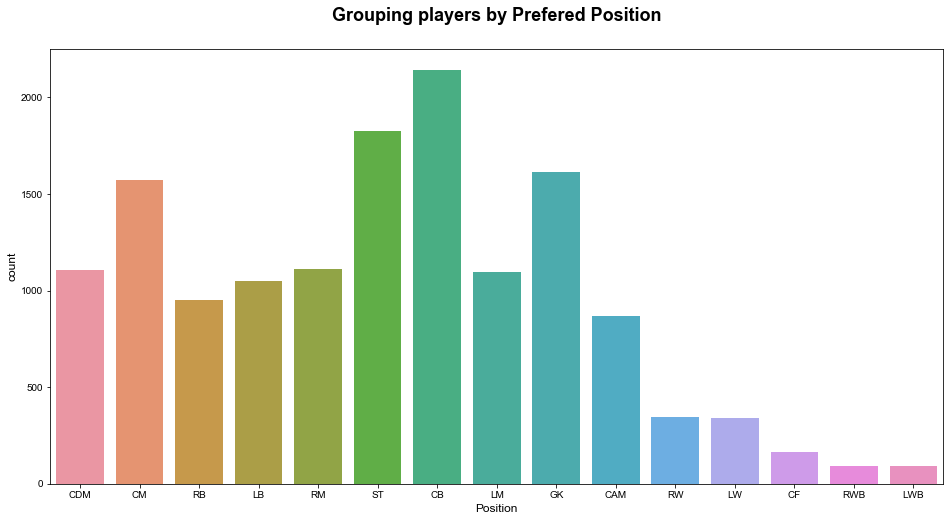

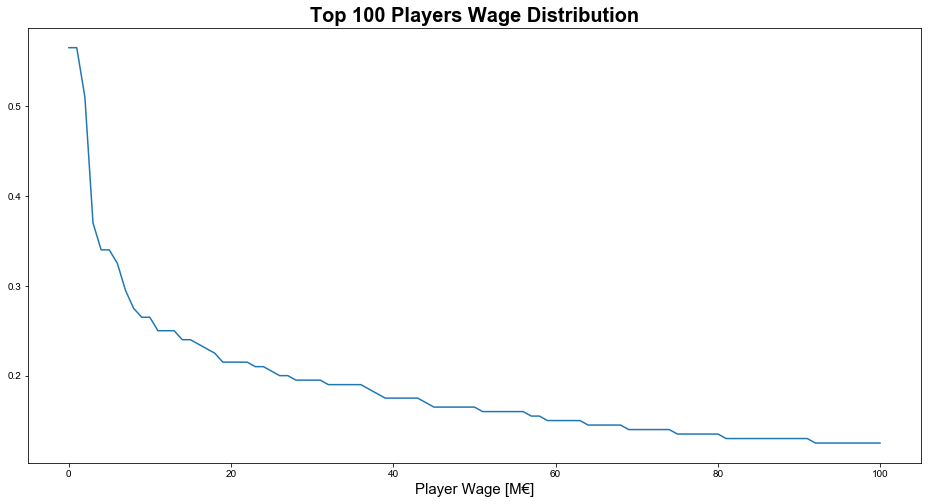

<Figure size 432x288 with 0 Axes>

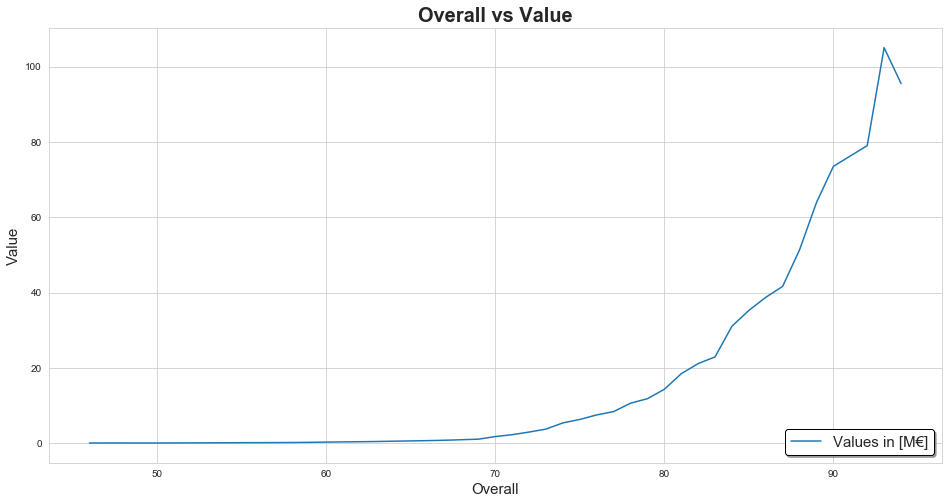

In [3]:
# Code Starts here
plt.figure(figsize=(16,8))
plt.title('Grouping players by Prefered Position', fontsize = 18, fontweight = 'bold', y = 1.05)
plt.xlabel('Number of players', fontsize=12)
plt.ylabel('Player age', fontsize=12)
sns.countplot(x='Position', data=train)

#Wage distribution of top 100 players
Wage_distribution = train.sort_values("Wage (M)", ascending = False).reset_index()[:101][['Name', 'Wage (M)']]
plt.figure(figsize=(16,8))
plt.title('Top 100 Players Wage Distribution', fontsize = 20, fontweight = 'bold')
plt.xlabel('Player Wage [M€]', fontsize=15)
sns.set_style('whitegrid')
plt.plot(Wage_distribution['Wage (M)'])

# Comparision graph of Overall vs values(M)
overall = train.sort_values('Overall')['Overall'].unique()
overall_value = train.groupby(['Overall'])['Value (M)'].mean()

plt.figure()
plt.figure(figsize=(16,8))
plt.title('Overall vs Value', fontsize=20, fontweight='bold')
plt.xlabel('Overall', fontsize=15)
plt.ylabel('Value', fontsize=15)
sns.set_style("whitegrid")
plt.plot(overall, overall_value, label="Values in [M€]")
plt.legend(loc=4, prop={'size': 15}, frameon=True,shadow=True, facecolor="white", edgecolor="black")
plt.show()

# Code ends here

### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using linear regression, predict the `Value (M)`. 
- Try improving upon the `r2_score` (R-Square) using different parameters that give the best score. You can use higher degree [Polynomial Features of sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to improve the model prediction. 



In [7]:
# Code Starts here

#Split into feature and target
X = train.drop(['Value (M)'], 1)
y = train[['Value (M)']]

#Independent variables
X = X[['Overall', 'Potential', 'Wage (M)']]

#Separate train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

print(X_train.head(2))
print(y_train.head(2))

# Instantiate linear regression
model = LinearRegression()

# fit the model on training data
model.fit(X_train, y_train)

# make prediction
y_pred = model.predict(X_test)

# calculate the mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(mae)

# calculate the r2 score
r2 = r2_score(y_test, y_pred)
print(r2)

# Code ends here

      Overall  Potential  Wage (M)
2980       62         68     0.001
6908       67         67     0.006
      Value (M)
2980      0.425
6908      0.180
1.3431536912551685
0.7587733808397649


In [8]:
# Instantiate third degree polynomial features
poly = PolynomialFeatures(degree=2)

# fit and transform polynomial features on X_train   
X_train_2 = poly.fit_transform(X_train)

# instantiate Linear regression model
model = LinearRegression()

# fit the model 
model.fit(X_train_2, y_train)

# transform on x_test 
X_test_2 = poly.transform(X_test)

# predict the model performance
y_pred_2 = model.predict(X_test_2)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred_2)
print(mae)

# calculate the r2 score
r2 = r2_score(y_test, y_pred_2)
print(r2)                          



0.7168874818344876
0.9285452751547129


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [11]:
# Code Starts here
# Prediction on test data

# Read the test data
test = pd.read_csv('test.csv')

# Storing the id from the test file
id_ = test['Id']

# Dropping the same columns from the test data
test = test[['Overall','Potential','Wage (M)']]

# Applying rfe on test data
test_poly = poly.transform(test)

# Predict on the test data
y_pred_test = model.predict(test_poly)
y_pred_test = y_pred_test.flatten()
print(y_pred_test)

# Create a sample submission file
sample_submission = pd.DataFrame({'Id':id_,'Value (M)':y_pred_test})

# Convert the sample submission file into a csv file
sample_submission.to_csv('sample_submission.csv',index=False)

# Code ends here

[16.20453142 19.70373631  1.36044225 ...  1.14279384 12.01775448
  4.61622169]
